In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/Women_Frailty.csv")

In [3]:
data.head()

,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [4]:
data.columns

Index(['Height', 'Weight', 'Age', 'Grip Strength', 'Frailty'], dtype='object')

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.head()

,height,weight,age,grip strength,frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   height         10 non-null     float64
 1   weight         10 non-null     int64  
 2   age            10 non-null     int64  
 3   grip strength  10 non-null     int64  
 4   frailty        10 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 528.0+ bytes


In [8]:
# Calculate BMI from weight & height

data['bmi'] = (703 * (data['weight']))/(data['height'] ** 2)
data['bmi'] = data['bmi'].round(2)

# Calculate grip strength in pounds
data['grip_strength_lbs'] = data['grip strength'] * 2.20462  # Conversion factor from KGS to LBS
data['grip_strength_lbs'] = data['grip_strength_lbs'].round(2)
# Calculate frailty index
# Got this from open source
data['frailty_index'] = (data['height'] / data['weight']) * data['age'] + (data['grip_strength_lbs'] / data['weight']) * data['age']
data['frailty_index'] = data['frailty_index'].round(2)

# Display the DataFrame with frailty index
print(data)

   height  weight  age  grip strength frailty    bmi  grip_strength_lbs  \
0    65.8     112   30             30      N   18.19              66.14   
1    71.5     136   19             31      N   18.70              68.34   
2    69.4     153   45             29      N   22.33              63.93   
3    68.2     142   22             28      Y   21.46              61.73   
4    67.8     144   29             24      Y   22.02              52.91   
5    68.7     123   50             26      N   18.32              57.32   
6    69.8     141   51             22      Y   20.35              48.50   
7    70.1     136   23             20      Y   19.46              44.09   
8    67.9     112   17             19      N   17.08              41.89   
9    66.8     120   39             31      N   18.91              68.34   

   frailty_index  
0          35.34  
1          19.54  
2          39.21  
3          20.13  
4          24.31  
5          51.23  
6          42.79  
7          19.31  
8  

In [12]:
data.to_csv("/content/preprocesed_women_frailty1.csv")

# **Data Visualization**

## **1. Age VS Frailty Index**

<ipython-input-21-b412cf74301b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='frailty', y='frailty_index', palette='Set2')


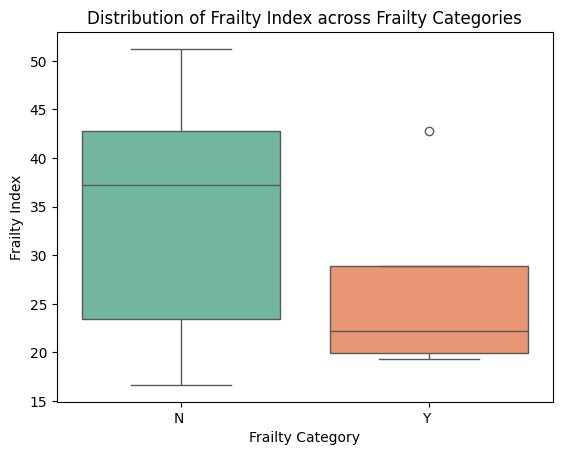

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains 'age', 'frailty_index', and a categorical 'frailty' column

# Create a box plot showing the distribution of 'frailty_index' for each 'frailty' category
sns.boxplot(data=data, x='frailty', y='frailty_index', palette='Set2')

# Set labels and title
plt.title('Distribution of Frailty Index across Frailty Categories')
plt.xlabel('Frailty Category')
plt.ylabel('Frailty Index')

plt.savefig('/content/result/Frailty_Index_Boxplot.jpg')
plt.show()

## **2. Body Mass Index (BMI) VS Frailty Status**

<ipython-input-22-34d3c2faa250>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='frailty', y='bmi', data=data, palette='Set2')


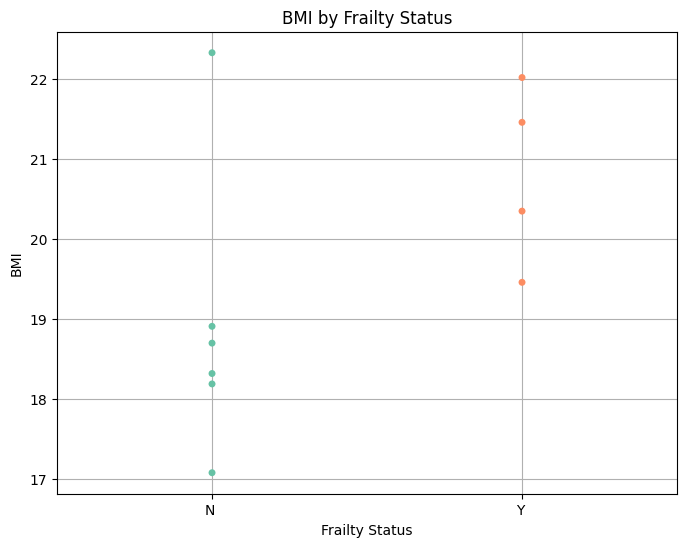

In [22]:
# Swarm plot of BMI by Frailty Status
plt.figure(figsize=(8, 6))
sns.swarmplot(x='frailty', y='bmi', data=data, palette='Set2')
plt.title('BMI by Frailty Status')
plt.xlabel('Frailty Status')
plt.ylabel('BMI')
plt.grid(True)
plt.savefig('/content/result/bmi_vs_frailty_swarmplot.jpg')
plt.show()

## **3. Average grip strength by Frailty Status**

<ipython-input-23-2a351cfbb3ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='frailty', y='grip strength', data=data, palette='viridis', inner='quartile')


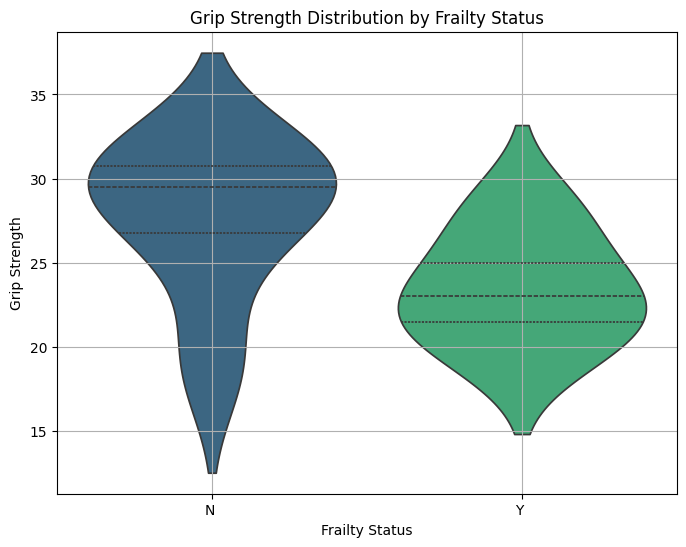

In [23]:
# Violin plot of Grip Strength by Frailty Status
plt.figure(figsize=(8, 6))
sns.violinplot(x='frailty', y='grip strength', data=data, palette='viridis', inner='quartile')
plt.title('Grip Strength Distribution by Frailty Status')
plt.xlabel('Frailty Status')
plt.ylabel('Grip Strength')
plt.grid(True)
plt.savefig('/content/result/gs_distribution_by_frailty_violin.jpg')
plt.show()
